Project Name-PRCP-1023-COVID-19 PREDICTION

Team Members:

1.Ashish Ray Mohapatra

2.Ancil Xavier

3.Ramchandra Rao
    

# Covid-19 Prediction 

### Confirmed , Recovered and Death in one go

### Load Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import datetime as datetme
import warnings
warnings.filterwarnings('ignore')

### Load data

In [3]:
df = pd.read_csv('./time_series_covid19_confirmed_global.csv')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [5]:
### Transpose data

In [6]:
df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [7]:
df = df.melt(id_vars="Country/Region", 
        var_name="Date", 
        value_name="Cases")

In [8]:
df

,Country/Region,Date,Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
64899,West Bank and Gaza,9/21/20,36151
64900,Western Sahara,9/21/20,10
64901,Yemen,9/21/20,2028
64902,Zambia,9/21/20,14175


In [9]:
df.shape

(64904, 3)

In [10]:
df_conf = df

In [11]:
df = pd.read_csv('./time_series_covid19_recovered_global.csv', )

In [12]:
df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [13]:
df = df.melt(id_vars="Country/Region", 
        var_name="Date", 
        value_name="Cases")

In [14]:
df.head()

,Country/Region,Date,Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [15]:
df.shape

(61732, 3)

In [16]:
df_recv = df

In [17]:
df = pd.read_csv('./time_series_covid19_deaths_global.csv', )

In [18]:
df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [19]:
df = df.melt(id_vars="Country/Region", 
        var_name="Date", 
        value_name="Cases")

In [20]:
df.head()

,Country/Region,Date,Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [21]:
df.shape

(64904, 3)

In [22]:
df_death = df

In [23]:
df_conf = df_conf.loc[(df_conf['Cases']>0)]

In [24]:
df_recv = df_recv.loc[(df_recv['Cases']>0)]

In [25]:
df_death = df_death.loc[(df_death['Cases']>0)]

In [26]:
# Lets first work with some sample data 
####df1 = df.loc[(df1['Cases']>0) & (df1['Country/Region']=='India')]

In [27]:
df_conf['Date']=pd.to_datetime(df_conf['Date'])
df_recv['Date']=pd.to_datetime(df_recv['Date'])
df_death['Date']=pd.to_datetime(df_death['Date'])

### Prepare the data

In [28]:
# sort the dataframe df1 by country/region , date
df_conf.sort_values(by = ['Country/Region', 'Date'], axis=0, ascending=[True, True], inplace=True,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

df_recv.sort_values(by = ['Country/Region', 'Date'], axis=0, ascending=[True, True], inplace=True,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

df_death.sort_values(by = ['Country/Region', 'Date'], axis=0, ascending=[True, True], inplace=True,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

In [29]:
df_conf['CasesPerD'] = df_conf.groupby(['Country/Region'])['Cases'].diff()
df_recv['CasesPerD'] = df_recv.groupby(['Country/Region'])['Cases'].diff()
df_death['CasesPerD'] = df_death.groupby(['Country/Region'])['Cases'].diff()

In [30]:
df_conf['CasesPerD'] = np.where(df_conf['CasesPerD'].isnull(), df_conf['Cases'], df_conf['CasesPerD'])
df_recv['CasesPerD'] = np.where(df_recv['CasesPerD'].isnull(), df_recv['Cases'], df_recv['CasesPerD'])
df_death['CasesPerD'] = np.where(df_death['CasesPerD'].isnull(), df_death['Cases'], df_death['CasesPerD'])

In [31]:
df_conf['yyyymm']=df_conf['Date'].dt.year.astype(str) + "-" + df_conf['Date'].dt.month.astype(str)
df_recv['yyyymm']=df_recv['Date'].dt.year.astype(str) + "-" + df_recv['Date'].dt.month.astype(str)
df_death['yyyymm']=df_death['Date'].dt.year.astype(str) + "-" + df_death['Date'].dt.month.astype(str)

In [32]:
df_conf.yyyymm.unique()

array(['2020-2', '2020-3', '2020-4', '2020-5', '2020-6', '2020-7',
       '2020-8', '2020-9', '2020-1'], dtype=object)

In [33]:
df_conf.CasesPerD=df_conf.CasesPerD.astype(np.int64)
df_recv.CasesPerD=df_recv.CasesPerD.astype(np.int64)
df_death.CasesPerD=df_death.CasesPerD.astype(np.int64)

In [34]:
df_conf1 = df_conf.groupby(['yyyymm']).sum()
df_recv1 = df_recv.groupby(['yyyymm']).sum()
df_death1 = df_death.groupby(['yyyymm']).sum()

In [35]:
df_conf1.drop(columns='Cases', axis=0, inplace=True)
df_recv1.drop(columns='Cases', axis=0, inplace=True)
df_death1.drop(columns='Cases', axis=0, inplace=True)

In [36]:
df_conf1['Perc']= df_conf1['CasesPerD']/df_conf1['CasesPerD'].sum()
df_recv1['Perc']= df_recv1['CasesPerD']/df_recv1['CasesPerD'].sum()
df_death1['Perc']= df_death1['CasesPerD']/df_death1['CasesPerD'].sum()


In [37]:
df_conf1

,CasesPerD,Perc
yyyymm,,
2020-1,655,0.000021
2020-2,7165,0.000231
2020-3,769655,0.024866
2020-4,2346136,0.075798
2020-5,2876871,0.092945
2020-6,4242833,0.137075
2020-7,7117734,0.229956
2020-8,7857004,0.253840
2020-9,5734479,0.185267


In [38]:
df_recv1

,CasesPerD,Perc
yyyymm,,
2020-1,22,0.000001
2020-2,1449,0.000068
2020-3,100882,0.004740
2020-4,826392,0.038832
2020-5,1620430,0.076144
2020-6,2712765,0.127473
2020-7,5022064,0.235987
2020-8,6430030,0.302148
2020-9,4567027,0.214605


In [39]:
df_death1

,CasesPerD,Perc
yyyymm,,
2020-1,1,0.000001
2020-2,105,0.000111
2020-3,40823,0.043037
2020-4,187485,0.197654
2020-5,133815,0.141073
2020-6,132573,0.139764
2020-7,166475,0.175505
2020-8,174478,0.183942
2020-9,112795,0.118913


In [40]:
df_conf1['month']=df_conf1.index
df_recv1['month']=df_recv1.index
df_death1['month']=df_death1.index


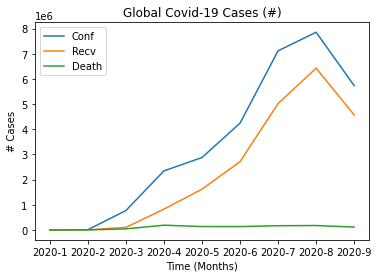

In [41]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title("Global Covid-19 Cases (#)")  
plt.plot(df_conf1.month, df_conf1.CasesPerD, label = 'Conf') # blue
plt.plot(df_recv1.month, df_recv1.CasesPerD, label = 'Recv') # orange
plt.plot(df_death1.month, df_death1.CasesPerD, label = 'Death') # green
plt.legend()
plt.show() 

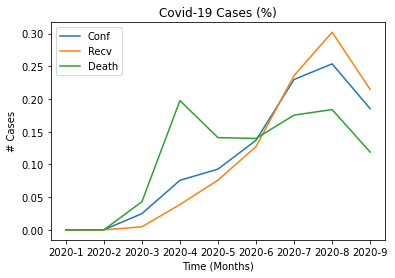

In [42]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title("Covid-19 Cases (%)")  
plt.plot(df_conf1.month, df_conf1.Perc, label = "Conf") # blue
plt.plot(df_recv1.month, df_recv1.Perc,  label = "Recv") # orange
plt.plot(df_death1.month, df_death1.Perc, label = 'Death') # green
plt.legend()
plt.show() 

## Conclusion: Even if there was jeoperdizing situation during Covid-19 pandemic world-wide, in the visulization we can see that the death rates were considerably low and the Recoveries of Confirmed cases moved alongside proportionately. What we feel is that the department accounted both infected-recovered and infected-recovered and again-infected cases together.